In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Explore data

In [2]:
df = pd.read_csv("train (1).csv")
df.head()
 

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

# Data cleaning

In [4]:
print("Original column names = ", df.columns)

df.columns= df.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ", df.columns)


Original column names =  Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')
Column names after conversion =  Index(['id', 'artist_name', 'track_name', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in_min/ms', 'time_signature', 'class'],
      dtype='object')


In [5]:
# Display the values that are in minutes (after exploring the values in duration_in_min/ms column, I found the values that are in minutes have value less than 30)
df.loc[(df['duration_in_min/ms'] < 30)]['duration_in_min/ms']

6        3.893933
10       4.347117
14       3.863867
18       5.227267
19       3.398883
           ...   
14370    6.357333
14371    4.347200
14375    2.213000
14380    2.642450
14395    2.614567
Name: duration_in_min/ms, Length: 2075, dtype: float64

In [6]:
condition = df['duration_in_min/ms'] < 30
condition.value_counts()

duration_in_min/ms
False    12321
True      2075
Name: count, dtype: int64

In [7]:
condition = df['duration_in_min/ms'] < 30 

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in_min/ms'] = df.loc[condition,'duration_in_min/ms']*60000

In [8]:
df.rename(columns={"duration_in_min/ms": "duration_in_ms"}, inplace = True)
df.head(10)[['duration_in_ms']]

,duration_in_ms
0,204947.00000
1,191956.00000
2,161037.00000
3,298093.00000
4,254145.00000
5,219587.00000
6,233635.99998
7,213125.00000
8,165293.00000
9,205056.00000


\\#### Find duplicate rows that have same values across all columns except for column "class"::

In [9]:
duplicateRows = df[df.duplicated(subset = df.columns.difference(['class']))]
duplicateRows

,id,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class


#### Before deleting duplicating rows from the dataset
For example, let's check the duplicate rows in the dataset based on "track_name" column value "Monsters". We have 6 rows with value "Monsters" in the "track_name" column.

In [10]:
df[df['track_name']=="Monsters"]

,id,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
4775,4776,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.00553,NaN,0.114,0.174,89.993,224053.0,4,6
6272,6273,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.00553,NaN,0.114,0.174,89.993,224053.0,4,10
10190,10191,Matchbook Romance,Monsters,59.0,0.362,0.945,10.0,-2.651,0,0.0575,0.00131,0.000025,0.154,0.487,114.797,243747.0,4,10
11701,11702,Dream State,Monsters,47.0,0.470,0.862,6.0,-5.494,0,0.1120,0.00504,NaN,0.059,0.473,162.226,222836.0,4,10
14250,14251,Dream State,Monsters,47.0,0.470,0.862,6.0,-5.494,0,0.1120,0.00504,NaN,0.059,0.473,162.226,222836.0,4,8


# Analyze Data

*italicized text*#### Check null or NaN valules

In [11]:
nan_col = df.columns[df.isnull().any()]
for i in nan_col:
    print(i, df[i].isnull().sum())

popularity 333
key 1609
instrumentalness 3541


In [13]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

for i in df_cont.columns:
  print(f'Skewness in {i} =',df_cont[i].skew())

Skewness in id = 0.0
Skewness in popularity = 0.07579046375488484
Skewness in danceability = -0.0756511486369389
Skewness in energy = -0.6566981463570856
Skewness in key = -0.0545210924911891
Skewness in loudness = -1.7480726517033285
Skewness in mode = -0.5845125235077557
Skewness in speechiness = 3.1133953563555172
Skewness in acousticness = 1.108932775257483
Skewness in instrumentalness = 1.5251660012747972
Skewness in liveness = 2.1782645918702275
Skewness in valence = 0.08868734986168407
Skewness in tempo = 0.37650698329039883
Skewness in duration_in_ms = 3.804277399235845
Skewness in time_signature = -4.1094001953189325
Skewness in class = -0.6665628522172127


<Axes: >

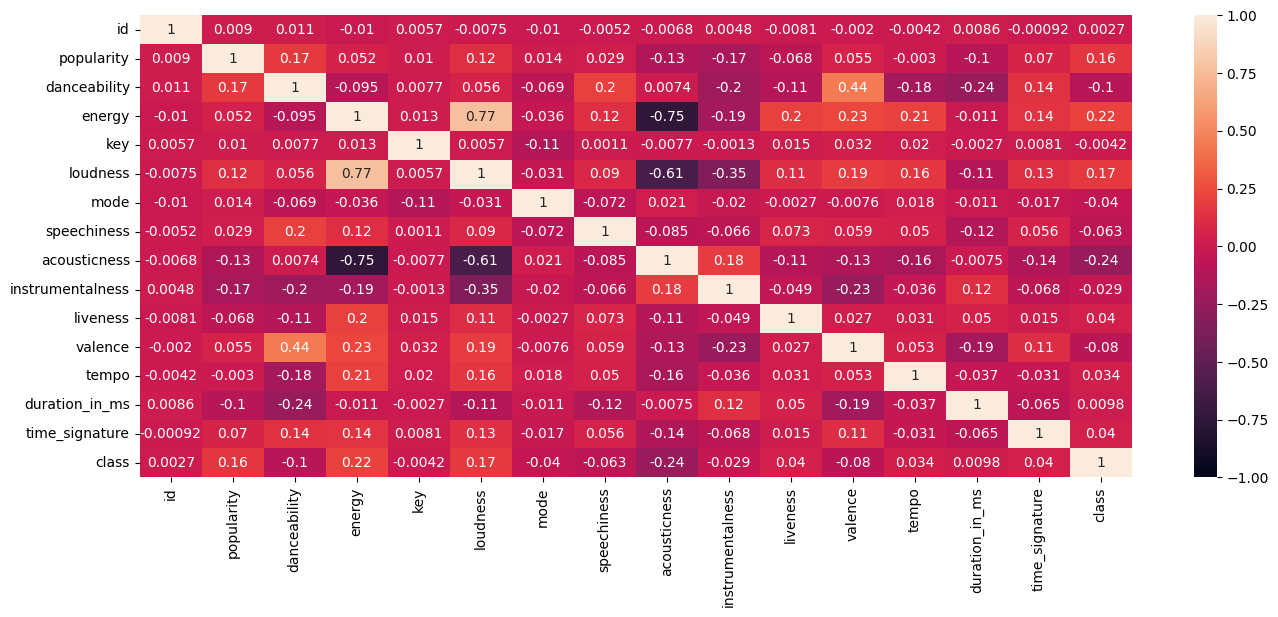

In [15]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

plt.figure(figsize=(16, 6)) # set the output figure size
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True) 

<Axes: xlabel='class', ylabel='count'>

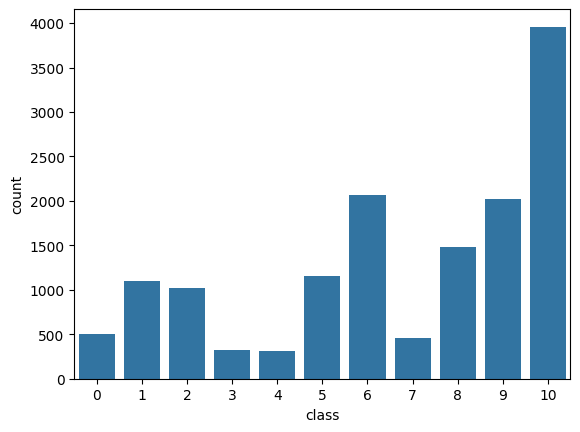

In [16]:
sns.countplot(data = df, x= df["class"])

# Prepare data (Feature Engineering)

In [17]:
## Imputing null values in "popularity" and "instrumentalness" columns with the median value of respective columns
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
df[['popularity','instrumentalness']] = imp.fit_transform(df[['popularity','instrumentalness']])

In [18]:
## Imputing null values in "key" column with a constant value of -1
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1)
df[['key']]=imp.fit_transform(df[['key']])

id                        0
popularity                0
danceability              0
key                       0
mode                      0
valence                   0
time_signature            0
duration_in_ms_trans      0
loudness_trans            0
speechiness_trans         0
acousticness_trans        0
instrumentalness_trans    0
liveness_trans            0
tempo_trans               0
dtype: int64

In [19]:
df.isnull().sum()

id                  0
artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_in_ms      0
time_signature      0
class               0
dtype: int64

In [20]:
df.drop(columns=["energy"], inplace = True)
df # print dataset after removing energy column

,id,artist_name,track_name,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,9.0,-6.649,0,0.0381,0.378000,0.003920,0.1060,0.235,152.429,204947.00000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.00000,4,6
2,3,Royal & the Serpent,phuck u,44.0,0.584,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.00000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,-1.0,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.00000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,6.0,-5.096,0,0.2490,0.183000,0.003920,0.2110,0.619,88.311,254145.00000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,NOISY,I Wish I Was A...,47.0,0.607,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.00000,4,10
14392,14393,BLOODSPOT,Deadline Story (feat. Patrick Boos),27.0,0.435,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.00000,4,8
14393,14394,Cold Years,Too Far Gone,22.0,0.415,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.00000,4,10
14394,14395,The Jaded Hearts Club,Reach Out I'll Be There,37.0,0.493,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.00000,4,10


In [21]:
df["duration_in_ms_trans"] = np.sqrt(df["duration_in_ms"]) # square root transform
df["loudness_trans"] = np.cbrt(df["loudness"]) # cube root transform
df["speechiness_trans"] = np.reciprocal(df["speechiness"]) # reciprocal transform
df["acousticness_trans"] = np.cbrt(df["acousticness"]) # cube root transform
df["instrumentalness_trans"] = np.log(df["instrumentalness"]) # log transform
df["liveness_trans"] = np.log(df["liveness"]) # log transform
df["tempo_trans"] = np.cbrt(df["tempo"]) # cube root transform

In [22]:
df.drop(columns = ['duration_in_ms','loudness','speechiness','acousticness','instrumentalness','liveness','tempo'], inplace = True)

In [23]:
df.head() # prints first 5 rows of the dataset

,id,artist_name,track_name,popularity,danceability,key,mode,valence,time_signature,class,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,1,Marina Maximilian,Not Afraid,37.0,0.334,9.0,0,0.235,4,9,452.710724,-1.880408,26.246719,0.723043,-5.541664,-2.244316,5.341819
1,2,The Black Keys,Howlin' for You,67.0,0.725,11.0,1,0.380,4,6,438.127835,-1.769975,11.415525,0.300739,-3.061872,-2.263364,5.103458
2,3,Royal & the Serpent,phuck u,44.0,0.584,7.0,1,0.635,4,10,401.294156,-1.826561,16.155089,0.098922,-0.454130,-1.258781,5.428304
3,4,Detroit Blues Band,Missing You,12.0,0.515,-1.0,1,0.501,3,2,545.978937,-2.450271,32.051282,0.967986,-3.849048,-1.203973,5.566380
4,5,Coast Contra,My Lady,48.0,0.565,6.0,0,0.619,4,5,504.127960,-1.720850,4.016064,0.567741,-5.541664,-1.555897,4.453194


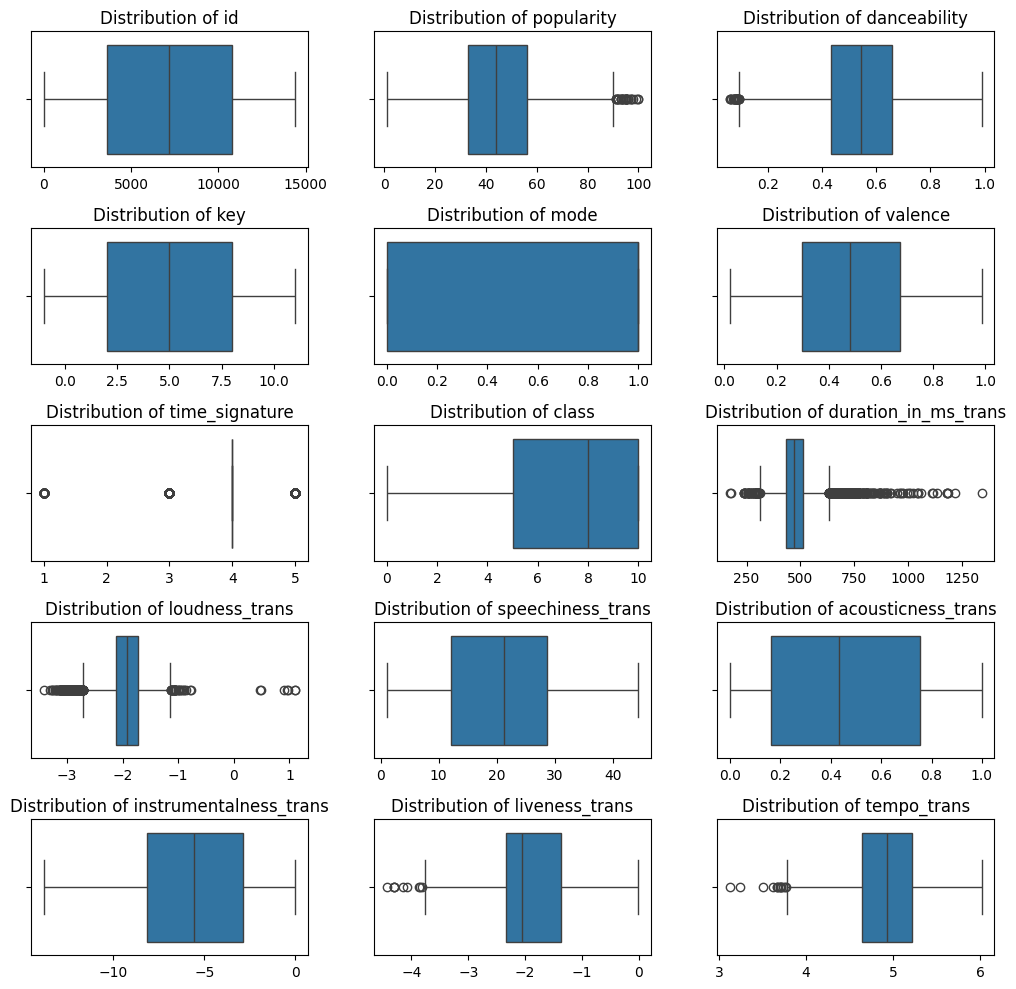

In [24]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

In [26]:
from sklearn.preprocessing import LabelEncoder
columns = ["artist_name","track_name"]
le = LabelEncoder()
for col in columns:
  df[col] = le.fit_transform(df[col])

In [27]:
df[["artist_name","track_name"]] # print artist_name & track_name columns after conversion

,artist_name,track_name
0,4260,6755
1,6558,4263
2,5639,11474
3,1750,6223
4,1377,6441
...,...,...
14391,4667,4555
14392,578,2262
14393,1396,10103
14394,6721,7634


[link text](https://)# Train data & build ML model

In [28]:
X = df.drop(columns=["class","track_name","artist_name"], axis=1)
y = df["class"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [30]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=11, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost accuracy is: 44.12%


In [46]:
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

normalizer = Normalizer()
normalized_x_train = pd.DataFrame(normalizer.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=10, objective='multi:softprob', n_estimators=1000, 
                        num_classes=11, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost accuracy is: 25.81%


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 44.07%


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear').fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

LRAcc = accuracy_score(y_pred,y_test) # Calculate accuracy
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 43.49%


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 44.26%


Decision Tree accuracy is: 42.52%


[Text(0.3466631355932203, 0.9545454545454546, 'x[10] <= -0.904\ngini = 0.853\nsamples = 9645\nvalue = [352.0, 730.0, 692.0, 218.0, 210.0, 769.0, 1408.0, 305.0\n977.0, 1326.0, 2658.0]'),
 Text(0.13983050847457626, 0.8636363636363636, 'x[5] <= -0.937\ngini = 0.722\nsamples = 2546\nvalue = [5.0, 204.0, 51.0, 1.0, 2.0, 52.0, 345.0, 0.0, 786.0\n96.0, 1004.0]'),
 Text(0.06779661016949153, 0.7727272727272727, 'x[9] <= -0.365\ngini = 0.629\nsamples = 652\nvalue = [3, 36, 4, 0, 1, 8, 72, 0, 351, 10, 167]'),
 Text(0.03389830508474576, 0.6818181818181818, 'x[10] <= -1.262\ngini = 0.493\nsamples = 397\nvalue = [0, 16, 2, 0, 0, 5, 23, 0, 270, 2, 79]'),
 Text(0.01694915254237288, 0.5909090909090909, 'gini = 0.326\nsamples = 234\nvalue = [0, 3, 0, 0, 0, 1, 8, 0, 189, 0, 33]'),
 Text(0.05084745762711865, 0.5909090909090909, 'gini = 0.658\nsamples = 163\nvalue = [0, 13, 2, 0, 0, 4, 15, 0, 81, 2, 46]'),
 Text(0.1016949152542373, 0.6818181818181818, 'x[7] <= 0.679\ngini = 0.736\nsamples = 255\nvalue = [3

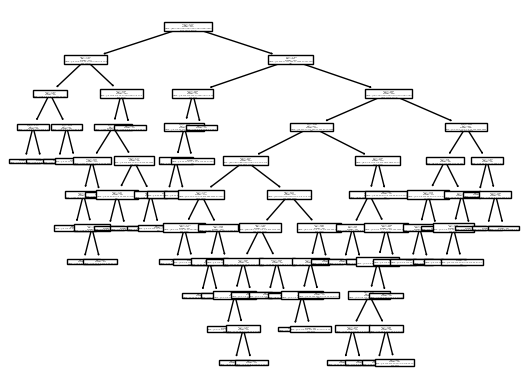

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20).fit(normalized_x_train, y_train)
DTclassifier = DecisionTreeClassifier(max_depth=100,max_leaf_nodes=50,min_samples_leaf = 100,random_state=0).fit(normalized_x_train, y_train)
y_pred = DTclassifier.predict(normalized_x_test)

DTAcc = accuracy_score(y_pred,y_test) # Calculating accuracy
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))
tree.plot_tree(DTclassifier)

In [39]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 44.22%


In [40]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30).fit(normalized_x_train, y_train)
y_pred = RFclassifier.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 44.47%


In [45]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=10, objective='multi:softprob', eval_metric='mlogloss', n_estimators=200, 
                        num_classes=9).fit(normalized_x_train, y_train)

y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost accuracy is: 45.38%
